# Naive Bayes Model: Step by Step 
Created by Shashi Kiran Chilukuri (ASU ID: 1217746764), schiluk6@asu.edu

The aim of this project is to develop a computing system that can understand and predict hand written digits of 0’s and 1’s. To develop this, trainsets and testsets for digits 0 and 1 were given. Here are the statistics for these datasets: 

    * Number of samples in the training set:  "0": 5000;"1": 5000.
    * Number of samples in the testing set: "0": 980; "1": 1135 
    
Assuming the prior probabilities are same (i.e., P(Y=0) = P(Y=1) =0.5), we need to predict the outcome using Naïve Bayes classifier. To achieve this, this project is divided into 4 tasks. Namely –

    * Task 1: Feature Extraction
    * Task 2: Calculate Parameters
    * Task 3: Calculate Probability and Feature Prediction
    * Task 4: Calculate Accuracy

Let’s get into each of these tasks.

### Getting data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import math
import geneNewData
import statistics
from math import sqrt, pi, exp

def main():
    myID='6764'
    geneNewData.geneData(myID)
    Numpyfile0 = scipy.io.loadmat('digit0_stu_train'+myID+'.mat')
    Numpyfile1 = scipy.io.loadmat('digit1_stu_train'+myID+'.mat')
    Numpyfile2 = scipy.io.loadmat('digit0_testset'+'.mat')
    Numpyfile3 = scipy.io.loadmat('digit1_testset'+'.mat')
    
    data = {}
    data['train0'] = Numpyfile0.get('target_img')
    data['train1'] = Numpyfile1.get('target_img')
    data['test0'] = Numpyfile2.get('target_img')
    data['test1'] = Numpyfile3.get('target_img')
    
    return data

data = main()
print('Generating trainsets and testsets')
print([len(data['train0']),len(data['train1']),len(data['test0']),len(data['test1'])])

Generating trainsets and testsets
[5000, 5000, 980, 1135]


### Plotting images 

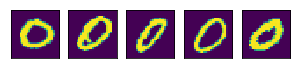

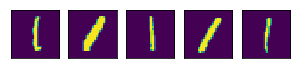

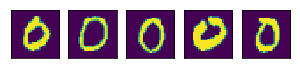

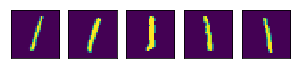

First 5 images of train0, train1, test0 and test1 datasets respectively
[None, None, None, None]


In [2]:
# Function to print images
def images(dataset):
    fig = plt.figure(figsize = (5,1))
    for idx in np.arange(5):
        ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(dataset[idx])) #, cmap ='gray')
    plt.show()
    pass

print(f'''First 5 images of train0, train1, test0 and test1 datasets respectively
{[images(data[i]) for i in data.keys()]}''')

### Task 1: Extracting features and labels

In this task, need to extract following two features for each of the image from the trainset.

    1.	Feature1: The average brightness of each image (average all pixel brightness values within a whole image array)
    2.	Feature2: The standard deviation of the brightness of each image (standard deviation of all pixel brightness values within a whole image array)

Feature 1 and Feature 2 are extracted for both train and test datasets and are kept in “trainSet” and “testSet” dictionaries.

In [3]:
def data_extraction(data):
    trainSet = {}
    trainLabels = {}
    testSet = {}
    testLabels = {}

    for dataset in data.keys():
        if dataset[:-1] == 'train':
            trainSet[eval(dataset[-1:])] = [[image.mean(),image.std()] for image in data[dataset]]
            trainLabels[eval(dataset[-1:])] = [int(dataset[-1:])] * len(data[dataset])

        else:
            testSet[eval(dataset[-1:])] = [[image.mean(),image.std()] for image in data[dataset]]
            testLabels[eval(dataset[-1:])] = [int(dataset[-1:])] * len(data[dataset])
    return trainSet, trainLabels, testSet, testLabels

trainSet, trainLabels, testSet, testLabels = data_extraction(data)

### Task 2: Calculate Parameters
In this task, need to calculate all the parameters for the two-class Naïve Bayes classifier. Here are the parameter values

In [4]:
# finding parameters 'mean' & 'variance'
def prameters_by_class(dataset):
    parameters = {}
    for labels, rows in dataset.items():
        parameters[labels] = [(statistics.mean(column),
                               statistics.variance(column),
                              len(column)) for column in zip(*rows)]
    return parameters
train_parameters = prameters_by_class(trainSet)
train_parameters

{0: [(44.130842857142859, 112.65821501430544, 5000),
  (87.363229445467454, 100.69963623475806, 5000)],
 1: [(19.29315892857143, 31.346790958404547, 5000),
  (61.218260565000172, 82.977566631048887, 5000)]}

### Task 3: Calculate Probability and Feature Prediction
In this task, need to implement mathematical expression to calculate the probability. For this used Normal(Gaussian) distribution function) for to classify/ predict all the unknow labels of test dataset.


In [5]:
from math import sqrt
from math import pi
from math import exp

def calculate_probability(x, mean, var):
    return((1 / (sqrt(2 * pi * var))) * exp(-((x-mean)**2 / (2 * var))))

In [6]:
def calculate_class_probabilities(parameters, dataset):  
    probabilities = {}
    for label, params in parameters.items():
        probabilities[label] = 0.5    
        for i in range(len(params)):
            mean, var, _ = params[i]
            probabilities[label] *= calculate_probability(dataset[i], mean, var)
    return probabilities

# calculate_class_probabilities(train_parameters, trainSet[0][0])

In [7]:
# Predict the class for a given row
def predict(parameters, dataset):
    probabilities = calculate_class_probabilities(parameters, dataset)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

In [8]:
# Naive Bayes Algorithm
def naive_bayes(train, test):
    parameters = prameters_by_class(train)
    predictions = list()
    for row in test:
        output = predict(parameters, row)
        predictions.append(output)
    return predictions

predictions_0 = naive_bayes(trainSet, testSet[0])
predictions_1 = naive_bayes(trainSet, testSet[1])

### Task 4: Calculate Accuracy
In this task, need to calculate accuracy of the predictions calculated above for test dataset for both digit 0 and digit1 respectively. Here are the calculated accuracies:

In [9]:
def getAccuracy(testLabels, predictions):
    correct = 0
    for index, item in enumerate(testLabels):
        if item == predictions[index]:
            correct += 1
    return correct/ len(testLabels)

In [10]:
Accuracy_0 = getAccuracy(testLabels[0], predictions_0)
Accuracy_1 = getAccuracy(testLabels[1], predictions_1)

In [11]:
print('Accuracy_0: {0}'.format(Accuracy_0))
print('Accuracy_1: {0}'.format(Accuracy_1))

Accuracy_0: 0.9173469387755102
Accuracy_1: 0.9233480176211454


### Conclusion
In conclusion, successfully developed the Naïve Bayes algorithm from scratch by performing all four task of Extracting features, Calculating mean & variance parameters, Calculating probability by using the Normal (Gaussian) distribution function & prediction the labels and finally, Calculating the accuracy of test set for digit 0 and 1. In the end, developed algorithm gave an accuracy score of 0.9173469387755102 for digit 0 and 0.9233480176211454 for digit 1 respectively. To validate this result, developed another model using standard GaussianNB() method from SKLearn with prior probability of 0.5. This model also gave exactly same prediction and accuracy scores. This clearly indicate the model developed from scratch works perfectly fine as the standard method from Sklearn library.